Copyright © [2025] [Ismail Ufuk Tasdan]

All rights reserved.

This notebook, and all associated content within it, is intended exclusively for use within Gateshead College. Unauthorized use, sharing, or copying of this file, via any medium, outside of Gateshead College is strictly prohibited and may be unlawful. This work is proprietary and confidential.


# **Final project of Ismail Ufuk Tasdan for Gateshead Bootcamp**

In this project, my aim is to create a robot that will trade in the crypto markets and generate profit. In other words, the goal is to beat the market.

**Introduction:**

The field of financial prediction remains a challenging yet profoundly rewarding domain, demanding innovative solutions to capture the subtle nuances of market dynamics. In this project, we focus on the development of a machine learning model capable of navigating and profiting from the financial markets, particularly cryptocurrencies. Our approach is rooted in the Merton model, a well-regarded framework for understanding market behaviors.

The complexity of market behavior necessitates the use of advanced modeling techniques. Traditional methods often fall short in capturing the stochastic nature of financial data, leading us to explore more robust solutions. This work introduces a Distributional Reinforcement Learning (RL) model, as detailed in a recent study available at [arxiv.org/pdf/1707.06887](https://arxiv.org/pdf/1707.06887), which promises a deeper understanding of potential market scenarios through its unique approach to learning distributions of possible outcomes.

**Data Analysis and Model Development:**

In our analysis, the transformation of data into a log-log scale has shown that near-normality is achievable, an essential step in applying sophisticated statistical models. This transformation addresses the challenge posed by the non-linear characteristics of raw financial data, such as 'Close' values. Using the principles of the Distributional Bellman Equation, our model successfully updates its internal understanding of the market, refining its predictions over time.

The model's effectiveness is initially observed through its ability to converge rewards with profits during training phases. This promising result leads us to further validations, where we employ Monte Carlo simulations to assess the model's performance across multiple stochastic scenarios. The consistent achievement of average positive profits in these tests provides a preliminary affirmation of our model's capabilities.

**Real-World Application and Ongoing Evaluation:**

The ultimate test of any financial model lies in its performance with real-world data. Our results indicate that, on average, the model predicts positive returns, suggesting that it has successfully captured useful patterns and trends. Nonetheless, the dynamic and evolving nature of financial markets necessitates continuous evaluation. Future work will focus on exploring additional metrics and conducting further analyses to ensure that the model remains effective under varying economic conditions.

In conclusion, while predicting financial markets with high accuracy consistently poses significant challenges, the strategic application of Distributional RL models holds promising potential. This approach not only enhances our understanding of market dynamics but also improves our capability to make profitable decisions in an unpredictable environment.


**The Plan for Developing the Q-Learning Trading Agent**

Here's the structured approach to developing and testing our Q-learning agent:

1. **Data Analysis for Gaussian Distribution**:
   - Initially, the data will be analyzed to determine if it conforms to a Gaussian or near-Gaussian distribution. This step is vital because a non-standard deviation significantly complicates the training process. Ensuring that the data behaves in a predictable manner is crucial for effective model training.

2. **Model Building and Monte Carlo Simulations**:
   - Next, the agent will be developed and trained using Monte Carlo simulations. This method is essential to prevent any lookahead bias, as it ensures the agent does not prematurely "see" the data. Instead, the agent will learn to recognize and adapt to the statistical behaviors presented during the simulations, which mimics real-world financial markets more accurately.

3. **Validation of Model Understanding**:
   - Finally, the model will be validated to confirm that it has accurately learned from the Monte Carlo simulations. The goal is to ensure that the agent can make informed and profitable decisions based on its training. Successful validation would indicate that the agent can effectively navigate and profit from real-world market conditions.

This methodical approach ensures that each phase of the agent's development is focused on building a robust understanding of market dynamics and the ability to apply learned strategies effectively.

**Notice for the Reader:**

Please be aware that the results presented in this work are not reproducible. This characteristic is intentional to prevent our model from overfitting to market noise, ensuring a more robust understanding of our model's performance during training. As a result, readers are encouraged to re-run the notebook to potentially achieve similar outcomes. This approach is fundamental in how stochastic systems adjust and operate, reflecting the dynamic nature of financial markets.


# Ethics

The data used here is gathered by Kucoin API. It is publically available here: https://www.kucoin.com/docs/beginners/introduction

For trades, it requires credentials, however for our purposes only raw data is required.

Therefore every data gathered here is publically available and ethical.

# Exploratory Data Analysis

## Modules for backtest

1. **Bokeh (Version 2.4.3)**: A Python interactive visualization library that makes it easy to build dashboards and visual representations of data.
2. **Backtesting**: A library used for creating and testing trading strategies against historical data.
3. **Python KuCoin**: A library to interact with the KuCoin cryptocurrency trading API.
4. **KuCoin Futures Python**: Another library for interacting with KuCoin's futures trading API.
5. **Requests**: A simple HTTP library for making API requests.
6. **WebSocket-Client**: A library for interacting with WebSocket APIs, commonly used for real-time data streaming.
7. **CCXT**: A cryptocurrency trading library that supports multiple exchanges, used for accessing trading and market data.

This step ensures all the dependencies are installed before running the subsequent parts of the program.


In [ ]:
!pip install bokeh==2.4.3
!pip install backtesting
!pip install python-kucoin
!pip install kucoin-futures-python
!pip install requests
!pip install websocket-client
!pip install ccxt

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.5/18.5 MB 37.0 MB/s eta 0:00:00
  Attempting uninstall: bokeh
    Found existing installation: bokeh 3.6.2
    Uninstalling bokeh-3.6.2:
      Successfully uninstalled bokeh-3.6.2
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
holoviews 1.20.0 requires bokeh>=3.1, but you have bokeh 2.4.3 which is incompatible.
panel 1.5.4 requires bokeh<3.7.0,>=3.5.0, but you have bokeh 2.4.3 which is incompatible.
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 175.5/175.5 kB 596.9 kB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173912 sha256=9b1c619b6d99de59914c10657d86a5834cad312f20cca2f97c648d6f61d5919c
  Stored in directory: /root/.cache/pip/wheels/e2/30/7f/19cbe31987c6ebdb47f1f510343249066711609e3da2d57176
Successfully built backtestin

## Fetch Real Data

This code retrieves historical cryptocurrency candlestick (OHLCV) data from the KuCoin API and processes it into a Pandas DataFrame for analysis. The main steps are as follows:

1. **Importing Required Libraries**: Libraries like `datetime` and `timedelta` handle date manipulations, `pandas` structures data, and `requests` interacts with the API. A delay is implemented using the `time` library to prevent hitting API rate limits.

2. **Defining the `fetch_data` Function**:
   - Accepts parameters such as:
     - **symbol**: The cryptocurrency pair (e.g., BTC-USDT).
     - **start_date & end_date**: Date range for the historical data.
     - **freq**: The time interval for candlestick data (e.g., 30 minutes).
   - Converts date strings into timestamp format and fetches data in chunks, moving backwards from `end_date`.

3. **Calling the KuCoin API**:
   - Builds the API URL dynamically with parameters like symbol, interval, and timestamps.
   - Fetches data using `requests.get()`, processes the JSON response, and converts it into a DataFrame with readable datetime and numeric values.

4. **Handling Multiple Chunks**:
   - The function iteratively fetches data in 2-day chunks, concatenating the results into a single DataFrame. This approach ensures compatibility with API data limits.

5. **Processing the Final DataFrame**:
   - Combines all fetched chunks, removes duplicate timestamps, and ensures the data is sorted chronologically.
   - Returns a cleaned DataFrame with columns like **Time**, **Open**, **High**, **Low**, **Close**, and **Volume**.

6. **Main Program Execution**:
   - The `fetch_data` function is called to retrieve 30-minute interval data for the BTC-USDT trading pair between specified dates.
   - A new DataFrame (`df_30min_close`) is created with all OHLC values set to the **Close** price for specific use cases.
   - The `Time` column is set as the index, and the data is validated by printing its head, tail, and shape.

This script provides a robust way to fetch, clean, and organize historical trading data for analysis or visualization.


In [ ]:
from datetime import datetime, timedelta
import pandas as pd
import requests
import json
import time  # This is for the optional delay between requests
def fetch_data(symbol='BTC-USDT', start_date='2021-03-26', end_date='2022-04-30', freq="30min"):
    # Convert dates to timestamps
    start_date = datetime.strptime(start_date, '%Y-%m-%d')
    end_date = datetime.strptime(end_date, '%Y-%m-%d')

    # List to store DataFrames
    all_data_list = []

    # The API endpoint URL
    base_url = 'https://api.kucoin.com/api/v1/market/candles'

    # The current fetch end date starts from end_date and moves backwards
    fetch_end_date = end_date

    while fetch_end_date > start_date:
        # Adjusted to fetch at least 2 days of data at a time
        fetch_start_timestamp = int((fetch_end_date - timedelta(days=2)).timestamp())

        # Ensure that the fetch_start_timestamp does not go below start_date
        fetch_start_timestamp = max(fetch_start_timestamp, int(start_date.timestamp()))

        # Build the API URL with parameters
        url = f'{base_url}?type={freq}&symbol={symbol}&startAt={fetch_start_timestamp}&endAt={int(fetch_end_date.timestamp())}'

        # Call the API
        response = requests.get(url)

        if response.status_code == 200:
            data = json.loads(response.text)

            if not data['data']:
                break  # If no data is returned, exit the loop

            # Create DataFrame from JSON response
            data_pd = pd.DataFrame(data['data'], columns=['Time', 'Open', 'Close', 'High', 'Low', 'Volume', 'Turnover'])
            data_pd['Time'] = pd.to_datetime(data_pd['Time'].astype(int), unit='s')
            data_pd[['Open', 'Close', 'High', 'Low', 'Volume']] = data_pd[['Open', 'Close', 'High', 'Low', 'Volume']].apply(pd.to_numeric)

            # Append current data_pd to the list
            all_data_list.append(data_pd)

            # Update the fetch end date to the last timestamp fetched
            fetch_end_date = data_pd['Time'].iloc[-1]  # Use the last timestamp from fetched data

            # Optional: Add a delay to avoid rate-limiting
            time.sleep(0.05)  # Delay for 1 second between requests

        else:
            print(f"Failed to fetch data: {response.status_code}")
            break

    # Concatenate all DataFrames in the list after the loop ends
    all_data = pd.concat(all_data_list, ignore_index=True).drop_duplicates('Time').reset_index(drop=True)

    # Reorder columns and sort by Time to ensure chronological order
    all_data = all_data[['Time', 'Open', 'Low', 'High', 'Close', 'Volume']]  # Reorder columns
    all_data.sort_values(by='Time', ascending=True, inplace=True)  # Sort by Time in ascending order

    return all_data

if __name__ == "__main__":
    symbol = 'BTC-USDT'
    df_30min = fetch_data(symbol=symbol, start_date='2023-03-26', end_date='2023-05-30', freq="30min")

    # Creating the DataFrame with 'Close' values for OHLCV
    df_30min_close = pd.DataFrame({
        'Open': df_30min['Close'],
        'High': df_30min['Close'],
        'Low': df_30min['Close'],
        'Close': df_30min['Close'],
        'Volume': df_30min['Volume']
    })

    # Set 'Time' as the index
    df_30min_close['Time'] = df_30min['Time']
    df_30min_close.set_index('Time', inplace=True)

    # Display the first few rows, last few rows, and shape of the DataFrame
    print(df_30min_close.head())
    print(df_30min_close.tail())  # Display the last few rows of the DataFrame
    print(df_30min_close.shape)  # Check the shape of the DataFrame to ensure it has exactly 1000 rows



                        Open     High      Low    Close      Volume
Time                                                               
2023-03-26 00:00:00  27437.3  27437.3  27437.3  27437.3   33.756537
2023-03-26 00:30:00  27532.2  27532.2  27532.2  27532.2  107.262695
2023-03-26 01:00:00  27567.3  27567.3  27567.3  27567.3   42.671270
2023-03-26 01:30:00  27592.9  27592.9  27592.9  27592.9   34.087167
2023-03-26 02:00:00  27574.8  27574.8  27574.8  27574.8   16.949014
                        Open     High      Low    Close      Volume
Time                                                               
2023-05-29 21:30:00  27667.8  27667.8  27667.8  27667.8   51.373510
2023-05-29 22:00:00  27583.8  27583.8  27583.8  27583.8   69.906682
2023-05-29 22:30:00  27688.9  27688.9  27688.9  27688.9   43.831712
2023-05-29 23:00:00  27768.2  27768.2  27768.2  27768.2  100.870477
2023-05-29 23:30:00  27736.3  27736.3  27736.3  27736.3   37.077506
(3120, 5)


**Comment**: Everything is expected as perfect as Kucoin provides clear data. However we need to check just in case.

At the bottom, `(3120, 5)` indicates the full dataset contains 3120 rows and 5 columns.

## Data Analysis

count     3120.000000
mean     28136.306699
std       1119.960017
min      25943.200000
25%      27229.750000
50%      27995.000000
75%      28913.075000
max      30940.200000
Name: Close, dtype: float64
0


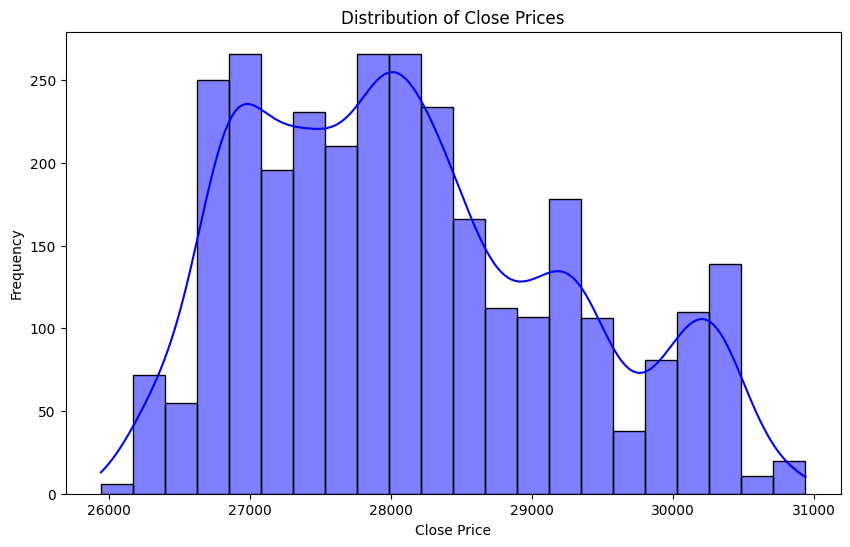

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm, skew, kurtosis



# Basic Descriptive Statistics
print(df_30min_close['Close'].describe())

# Check for missing values
print(df_30min_close['Close'].isnull().sum())

# Plotting the distribution of 'Close' prices
plt.figure(figsize=(10, 6))
sns.histplot(df_30min_close['Close'], kde=True, color='blue')
plt.title('Distribution of Close Prices')
plt.xlabel('Close Price')
plt.ylabel('Frequency')
plt.show()


**Comment**: As anticipated, there are no null values in the dataset, reflecting the high-quality data typically provided by Kucoin and other reputable cryptocurrency exchanges.

The distribution of close prices exhibits a multimodal pattern, characterized by multiple peaks. This suggests the presence of distinct market behaviors or subgroups, warranting a more in-depth analysis to uncover underlying trends or factors.

In [ ]:
# Calculate and print skewness and kurtosis
skewness = skew(df_30min_close['Close'])
kurtosis_val = kurtosis(df_30min_close['Close'])
print(f'Skewness: {skewness}')
print(f'Kurtosis: {kurtosis_val}')

# Normality Test
from scipy.stats import shapiro
stat, p = shapiro(df_30min_close['Close'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Interpret
alpha = 0.05
if p > alpha:
    print('Sample looks Gaussian (fail to reject H0)')
else:
    print('Sample does not look Gaussian (reject H0)')


Skewness: 0.4617048545425433
Kurtosis: -0.6707092642413208
Statistics=0.960, p=0.000
Sample does not look Gaussian (reject H0)


Here, we delve deeper into the statistical nature of the Close price data by calculating its skewness and kurtosis. Skewness tells us about the asymmetry of the data distribution, whereas kurtosis indicates the tailedness. Both these measures help in understanding the underlying distribution and potential deviations from normality.

We also perform a Shapiro-Wilk test to formally test the normality of the data. The result of this test will guide us in deciding whether we can assume a Gaussian distribution, which is a common assumption for many statistical modeling techniques. If the data is not normally distributed, we might have to consider transformations or different types of models that do not assume normality.

Thus we need more deeper analysis.

count    3117.000000
mean        0.000736
std         0.328385
min        -4.080264
25%        -0.123619
50%         0.000970
75%         0.122549
max         3.443592
Name: Returns, dtype: float64


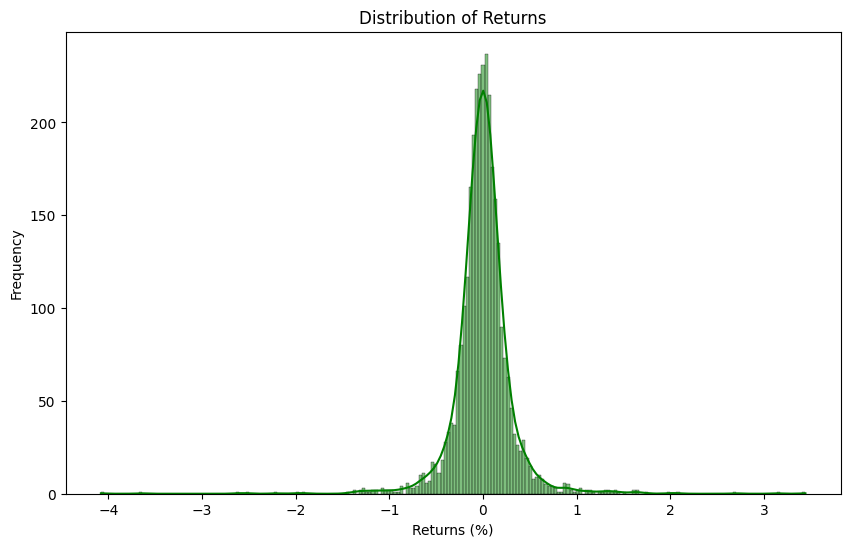

Skewness of Returns: nan
Kurtosis of Returns: nan
Statistics=nan, p=nan
Returns distribution does not look Gaussian (reject H0)


In [ ]:
# Calculate returns from close prices
df_30min_close['Returns'] = df_30min_close['Close'].pct_change() * 100

# Basic Descriptive Statistics for Returns
print(df_30min_close['Returns'].describe())

# Plotting the distribution of Returns
plt.figure(figsize=(10, 6))
sns.histplot(df_30min_close['Returns'], kde=True, color='green')
plt.title('Distribution of Returns')
plt.xlabel('Returns (%)')
plt.ylabel('Frequency')
plt.show()

# Calculate and print skewness and kurtosis for Returns
skewness_returns = skew(df_30min_close['Returns'])
kurtosis_returns = kurtosis(df_30min_close['Returns'])
print(f'Skewness of Returns: {skewness_returns}')
print(f'Kurtosis of Returns: {kurtosis_returns}')

# Normality Test for Returns
stat, p = shapiro(df_30min_close['Returns'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# Interpret
if p > alpha:
    print('Returns distribution looks Gaussian (fail to reject H0)')
else:
    print('Returns distribution does not look Gaussian (reject H0)')



**Comment:** Now we are getting somewhere. It has log-normal distribution. Thus firstly we need to transform the data so that returns become all positive.

<ipython-input-12-e30b15285d94>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_30min_close['Adjusted Returns'] = df_30min_close['Returns'].apply(lambda x: x if x >= 1 else 1/x)


                       Close   Returns  Adjusted Returns
Time                                                    
2023-03-26 01:00:00  27567.3  1.001275          1.001275
2023-03-26 01:30:00  27592.9  1.000929          1.000929
2023-03-26 02:00:00  27574.8  0.999344          1.000656
2023-03-26 02:30:00  27592.5  1.000642          1.000642
2023-03-26 03:00:00  27553.8  0.998597          1.001405


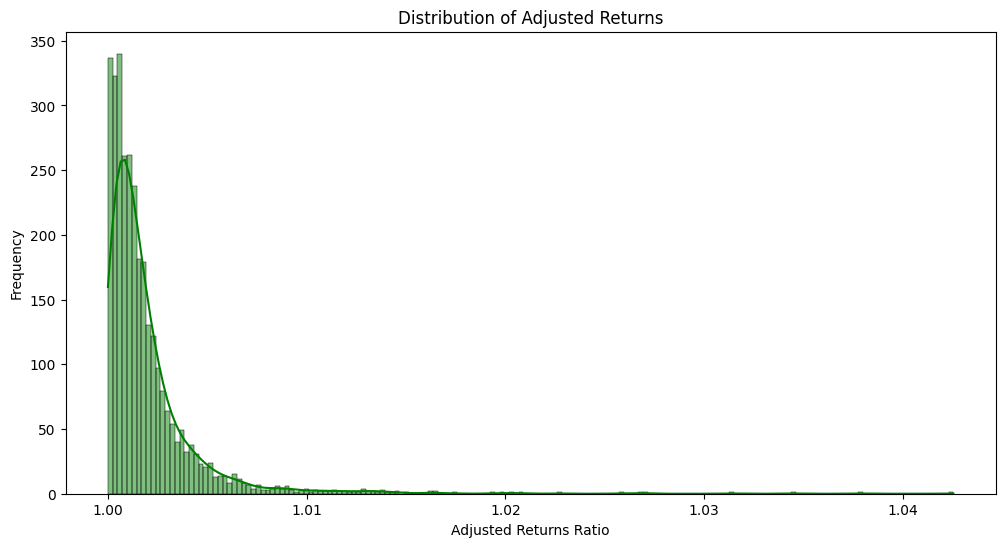

In [ ]:
# Calculate the ratio of each close price to the previous close price
df_30min_close['Returns'] = df_30min_close['Close'] / df_30min_close['Close'].shift(1)

# Remove any NaN values that arise from the calculation of the first element which has no previous element
df_30min_close = df_30min_close.dropna()

# If you want all results to be above 1 (all positive gains), you can adjust like this:
df_30min_close['Adjusted Returns'] = df_30min_close['Returns'].apply(lambda x: x if x >= 1 else 1/x)

# Display the first few rows to verify
print(df_30min_close[['Close', 'Returns', 'Adjusted Returns']].head())

# Plotting the distribution of Adjusted Returns
plt.figure(figsize=(12, 6))
sns.histplot(df_30min_close['Adjusted Returns'], kde=True, color='green')
plt.title('Distribution of Adjusted Returns')
plt.xlabel('Adjusted Returns Ratio')
plt.ylabel('Frequency')
plt.show()


**Comment:** Here we can see its log-normal distributions very well. Thus we will transform the data and see if it is "likely" normal.

Log Adjusted Returns: Statistics=0.967, p=0.000
Log Adjusted Returns do not follow a normal distribution (reject H0)


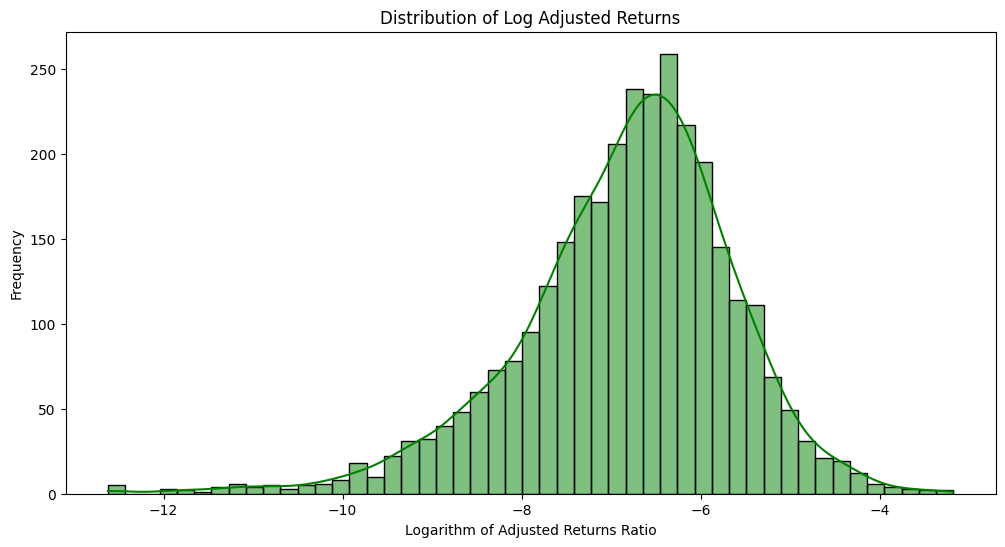

In [ ]:
# Applying the logarithmic transformation to Adjusted Returns
df_30min_close['Log Adjusted Returns'] = np.log(np.log(df_30min_close['Adjusted Returns']))

# Ensure no infinities or NaNs in the data
df_30min_close.replace([np.inf, -np.inf], np.nan, inplace=True)
df_30min_close.dropna(inplace=True)


from scipy.stats import shapiro

# Shapiro-Wilk Test on Log Adjusted Returns
stat, p = shapiro(df_30min_close['Log Adjusted Returns'])
print(f'Log Adjusted Returns: Statistics={stat:.3f}, p={p:.3f}')
if p > 0.05:
    print("Log Adjusted Returns likely follow a normal distribution (fail to reject H0)")
else:
    print("Log Adjusted Returns do not follow a normal distribution (reject H0)")

# Plotting the distribution of Log Adjusted Returns
plt.figure(figsize=(12, 6))
sns.histplot(df_30min_close['Log Adjusted Returns'], kde=True, color='green')
plt.title('Distribution of Log-Log Adjusted Returns')
plt.xlabel('Log-Logarithm of Adjusted Returns Ratio')
plt.ylabel('Frequency')
plt.show()

**Comment:** By Shapiro test, it is still not normal due to tail distribution. Yet still it is easier to handle. Hence we will use this distribution to tell the model about the states.

# Model Building

## Monte Carlo

This comprehensive code snippet simulates stock prices using Monte Carlo methods, specifically Merton's jump diffusion model, and visualizes the results. It is structured to perform a sequence of operations involving data simulation, transformation, and visualization:

1. **Library Imports and Configurations**:
   - Essential libraries such as `numpy`, `pandas`, `scipy`, `matplotlib`, and `seaborn` are imported for numerical operations, data manipulation, statistical calculations, and plotting.
   - Runtime warnings are suppressed to ensure a clean output log, particularly for common numerical errors in simulations.

2. **Function for Data Transformation** (`backtesting_transform_data`):
   - Converts raw simulation output into a structured DataFrame with OHLC (Open, High, Low, Close) format for backtesting purposes.
   - It takes parameters like target column, start date, frequency, and whether to transpose the DataFrame, providing flexibility in data processing.

3. **Monte Carlo Simulator Class**:
   - Defined to simulate stock price paths using parameters such as initial stock price, strike price, maturity, drift, volatility, jump intensity (Lambda), and jump sizes (a, b).
   - Supports both Gaussian and jump diffusion processes, accommodating different stochastic processes in financial modeling.
   - The class contains methods to simulate paths, plot the results, and fetch transformed data ready for further analysis or backtesting.

4. **Simulation and Visualization**:
   - An instance of `MonteCarloSimulator` is created with specific parameters tailored to the user’s requirements (e.g., number of steps, simulation type).
   - The simulation is run to either meet a zero expectation value condition or generate a set number of paths, after which the paths are plotted using `matplotlib` to visualize the stock price dynamics over time.

5. **Output**:
   - The final output includes a plot of the simulated stock price paths and a DataFrame of the transformed data, showing how the stock prices evolve according to the defined stochastic model.

This script is ideal for financial analysts and researchers looking to understand and visualize the behavior of stock prices under different stochastic models in a Monte Carlo simulation framework.


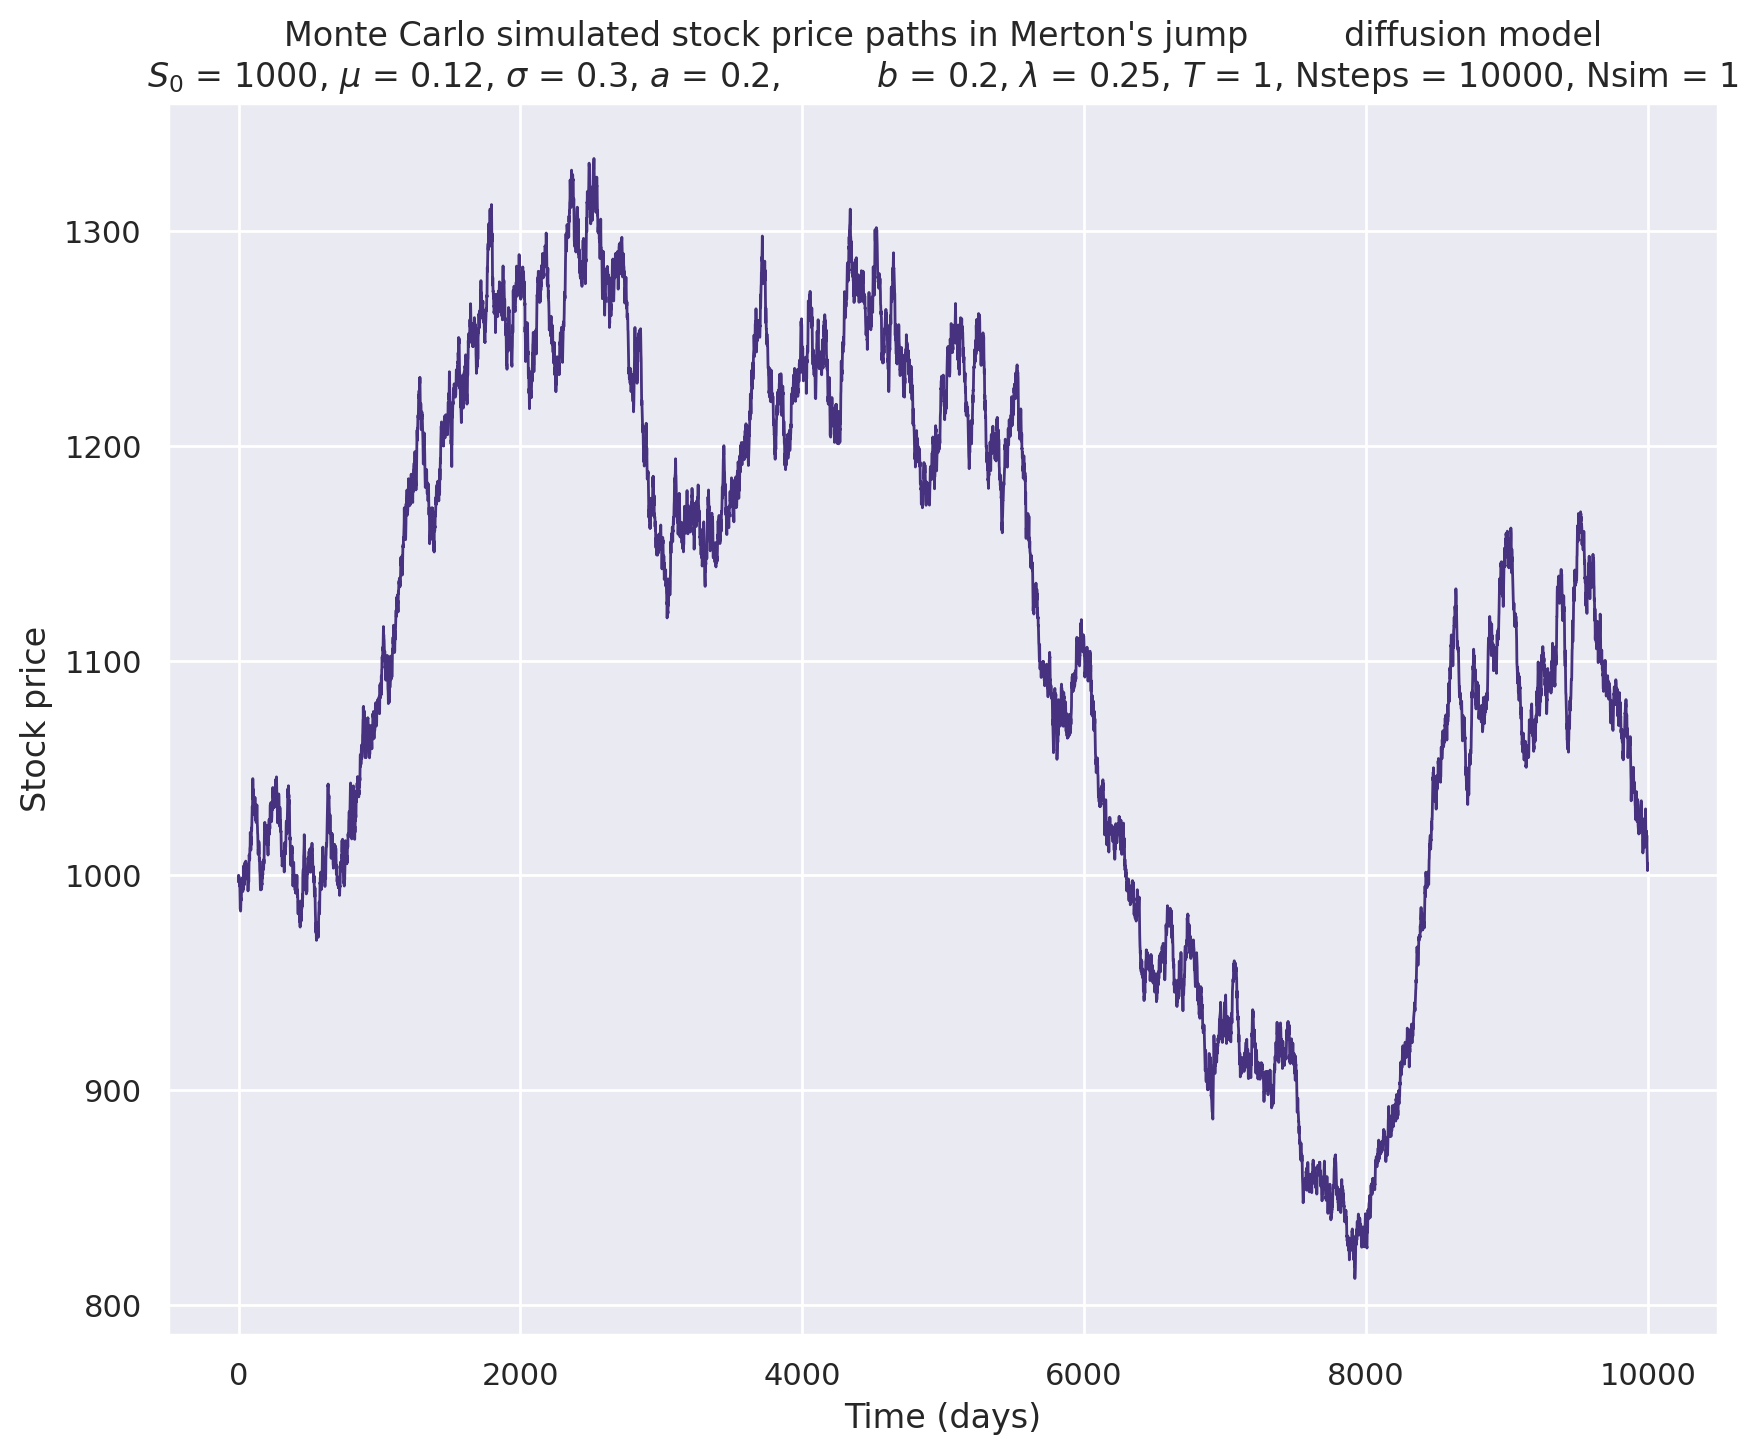

                            Open         High          Low        Close
1900-01-01 00:00:00  1000.000000  1000.000000  1000.000000  1000.000000
1900-01-01 00:30:00   996.869727   996.869727   996.869727   996.869727
1900-01-01 01:00:00   999.466480   999.466480   999.466480   999.466480
1900-01-01 01:30:00   999.271915   999.271915   999.271915   999.271915
1900-01-01 02:00:00   996.602262   996.602262   996.602262   996.602262
...                          ...          ...          ...          ...
1900-07-28 06:00:00  1010.917198  1010.917198  1010.917198  1010.917198
1900-07-28 06:30:00  1008.547557  1008.547557  1008.547557  1008.547557
1900-07-28 07:00:00  1005.418869  1005.418869  1005.418869  1005.418869
1900-07-28 07:30:00  1002.162501  1002.162501  1002.162501  1002.162501
1900-07-28 08:00:00  1005.390845  1005.390845  1005.390845  1005.390845

[10001 rows x 4 columns]


In [ ]:
import numpy as np
import pandas as pd
from scipy import stats
from scipy.stats import norm
import matplotlib.pyplot as plt
import seaborn as sns
import random, logging
import warnings

# Suppress specific runtime warnings
warnings.filterwarnings('ignore', message='Degrees of freedom <= 0 for slice')
warnings.filterwarnings('ignore', category=RuntimeWarning, message='divide by zero encountered in double_scalars')

import pandas as pd
# np.random.seed(0)

def backtesting_transform_data(df, target_column='Close', start_date='1900-01-01 00:00:00', freq='30min',transpose=True):
    if transpose:
        df_transformed = pd.DataFrame(df).transpose()
    else:
        df_transformed = pd.DataFrame(df)
    df_transformed = df_transformed.rename(columns={0: 'Close'})
    # Create the new DataFrame with 'Open', 'High', 'Low', and 'Close' columns
    transformed_data = pd.DataFrame({
        'Open': df_transformed[target_column],
        'High': df_transformed[target_column],
        'Low': df_transformed[target_column],
        'Close': df_transformed[target_column],
    })

    # Generate a datetime index starting from the specified date
    num_rows = len(transformed_data)
    datetime_index = pd.date_range(start=start_date, periods=num_rows, freq=freq)

    # Set the datetime index to the new DataFrame
    transformed_data.index = datetime_index

    return transformed_data


sns.set(palette='viridis')
%matplotlib inline
%config InlineBackend.figure_format='retina'

class MonteCarloSimulator:
    def __init__(self, S=1000, X=1.05, T=1, mu=0.12, sigma=0.3,
                 Gaussian=True, Lambda=0.25, a=0.2, b=0.2,alpha=0.05, Nsteps=None, Nsim=1):
        self.S = S
        self.X = X
        self.T = T
        self.mu = mu
        self.sigma = sigma
        self.Lambda = Lambda
        self.a = a
        self.b = b
        self.Nsteps = Nsteps if Nsteps else int(252 * 24 * 60 / 1000)
        self.Nsim = Nsim
        self.alpha = alpha
        self.Delta_t = T / self.Nsteps
        self.Gaussian = Gaussian
        #print('Delta t = {:.6f}'.format(self.Delta_t))
        self.simulated_paths = None

    def simulate_jump_diffusion_paths(self, Gaussian=False):
        simulated_paths = np.zeros([self.Nsim, self.Nsteps + 1])
        simulated_paths[:, 0] = self.S

        # Generate the necessary random variables
        Z_0 = np.random.normal(size=(self.Nsim, self.Nsteps))
        Z_1 = np.random.normal(size=[self.Nsim, self.Nsteps])
        Z_2 = np.random.normal(size=[self.Nsim, self.Nsteps])
        Poisson = np.random.poisson(self.Lambda * self.Delta_t, [self.Nsim, self.Nsteps])

        for i in range(self.Nsteps):
            if Gaussian:
                simulated_paths[:, i + 1] = simulated_paths[:, i] * np.exp(self.sigma * np.sqrt(self.Delta_t) * Z_1[:, i])
            else:
                jump_component = self.a * Poisson[:, i] + self.b * np.sqrt(Poisson[:, i]) * Z_2[:, i]
                drift_diffusion_component = (self.mu - 0.5 * self.sigma**2) * self.Delta_t + self.sigma * np.sqrt(self.Delta_t) * Z_1[:, i]
                simulated_paths[:, i + 1] = simulated_paths[:, i] * np.exp(drift_diffusion_component + jump_component)

        self.simulated_paths = simulated_paths
        return simulated_paths

    def plot_simulation(self):
        plt.figure(figsize=(10, 8))
        ax = plt.axes()

        t = np.linspace(0, self.T, self.Nsteps + 1) * self.Nsteps
        for i in range(self.Nsim):
            simulated_paths = self.simulated_paths
            jump_diffusion = ax.plot(t, simulated_paths.transpose())
            plt.setp(jump_diffusion, linewidth=1)

        ax.set(title="Monte Carlo simulated stock price paths in Merton's jump \
        diffusion model\n$S_0$ = {}, $\mu$ = {}, $\sigma$ = {}, $a$ = {}, \
        $b$ = {}, $\lambda$ = {}, $T$ = {}, Nsteps = {}, Nsim = {}"\
              .format(self.S, self.mu, self.sigma, self.a, self.b, self.Lambda, self.T, self.Nsteps, self.Nsim), \
              xlabel='Time (days)', ylabel='Stock price')
        plt.show()

    def get_monte_carlo_data(self, Gaussian=False):
        simulated_paths = self.simulate_jump_diffusion_paths(Gaussian=Gaussian)
        return backtesting_transform_data(simulated_paths)

    def zero_exp_value(self, max_attempts=500, threshold=0.01):
        for _ in range(max_attempts):
            data = self.get_monte_carlo_data(Gaussian=self.Gaussian)
            final_value = data['Close'].iloc[-1]
            if self.S * (1 - threshold) < final_value < self.S * (1 + threshold):
                return data
        return None


simulator = MonteCarloSimulator(Nsteps = 10000, Gaussian=True)
# monte_carlo_data_close = simulator.get_monte_carlo_data(Gaussian=True)
monte_carlo_data_close = simulator.zero_exp_value()
simulator.plot_simulation()
print(monte_carlo_data_close)

**Comment**: We have only one real data, however we can generate similar data as much as possible. Thats why we use Merton model to account for jump_component. See https://www.investopedia.com/terms/m/mertonmodel.asp for further details.

## Preprocess

This function `preprocess_to_match` is designed to adjust the financial time series data in one DataFrame (`data1`) so that its statistical properties (mean and standard deviation) match those of another DataFrame (`data2`). This is particularly useful in financial modeling and simulations where consistency between different data sets is crucial for comparison or further analysis.

Parameters:
- **data1** (`pd.DataFrame`): This is the DataFrame whose 'close' column will be adjusted. It represents the target data that needs modification.
- **data2** (`pd.DataFrame`): This DataFrame serves as the reference. The 'close' column in `data1` will be adjusted to match the mean and standard deviation of the 'close' column in `data2`.
- **column** (`str`): Specifies the column to be adjusted. The default is 'close', but it can be set to any other column name containing numerical data.

Process:
1. **Compute Statistics**: The function first calculates the mean and standard deviation of the specified column in both `data1` and `data2`.
2. **Normalize `data1`**: The values in `data1` are normalized to have zero mean and unit variance. This is achieved by subtracting the mean of `data1` and dividing by its standard deviation.
3. **Adjust `data1` to Match `data2`**: The normalized data is then scaled and shifted to match the mean and standard deviation of `data2`. This involves multiplying by the standard deviation of `data2` and adding the mean of `data2`.
4. **Return Adjusted Data**: A new DataFrame is created based on `data1` with the adjusted values in the specified column.


In [ ]:
import pandas as pd
import numpy as np

def preprocess_to_match(data1, data2, column='close'):
    # Calculate mean and standard deviation of the 'close' data in both datasets
    mean1, std1 = data1[column].mean(), data1[column].std()
    mean2, std2 = data2[column].mean(), data2[column].std()

    # Normalize data1 to zero mean and unit variance
    normalized_data1 = (data1[column] - mean1) / std1

    # Scale and shift data1 to match the mean and standard deviation of data2
    adjusted_data1 = normalized_data1 * std2 + mean2

    # Return a new DataFrame with adjusted 'close' column
    result = data1.copy()
    result[column] = adjusted_data1
    return result
simulator = MonteCarloSimulator(Nsteps = 1000)
data1 = simulator.get_monte_carlo_data(Gaussian=True)

simulator = MonteCarloSimulator(Nsteps = 1000)
data2 = simulator.get_monte_carlo_data(Gaussian=True)


processed_data = preprocess_to_match(data1, data2, column='Close')


## Training

Now we will use Distributional Q-learning algorithm explained for matching distributions by distributions. The explanation can be found here: https://www.youtube.com/live/IAaUXszVT_A?si=6UTNw3_pP2oAwIfy

The scientific paper can be found here: https://arxiv.org/pdf/1707.06887

Overview of Distributional Q-Learning Implementation

This script establishes a reinforcement learning framework using the Distributional Q-Learning approach, which estimates the full distribution of future rewards, not just their expected values. This approach is aimed at improving risk assessment and decision-making under uncertainty.

Key Components of the Script:

- Warning Suppression: The script suppresses warnings to ensure clean output during execution.

- Class Definitions:
  - DistributionalQLearningAgent: Manages a distributional Q-learning agent, including state management and action selection based on policy (softmax or greedy).
  - ActionBasedStrategy: A trading strategy class for backtesting that uses the Distributional Q-Learning Agent to manage positions and execute trades based on the agent's recommendations.

Agent and Strategy Interaction:
- The agent's actions are based on the state of the stock market, represented by a sliding window of price returns. The agent learns to maximize the expected utility of returns, adjusted by the risk preference parameter (p_value).

Simulation and Backtesting:
- Synthetic price data is generated through Monte Carlo simulation to train the agent, simulating real market behaviors under controlled conditions.
- Backtesting is performed using the backtesting.py library, which allows for detailed performance analytics and iterative strategy refinement.

Execution Flow:
- The script conducts multiple training episodes, where each episode represents a complete simulation of market conditions from start to finish. Performance metrics are gathered to assess the effectiveness of the strategy and the learning progression of the agent.
- After training, the script validates the learned strategy against new simulated data to ensure robustness and to mitigate overfitting.

Purpose of the Script:
This setup is crucial for developing, testing, and validating algorithmic trading strategies that are robust across different market conditions. The implementation of Distributional Q-Learning in a trading context highlights an advanced application of machine learning techniques in financial markets.


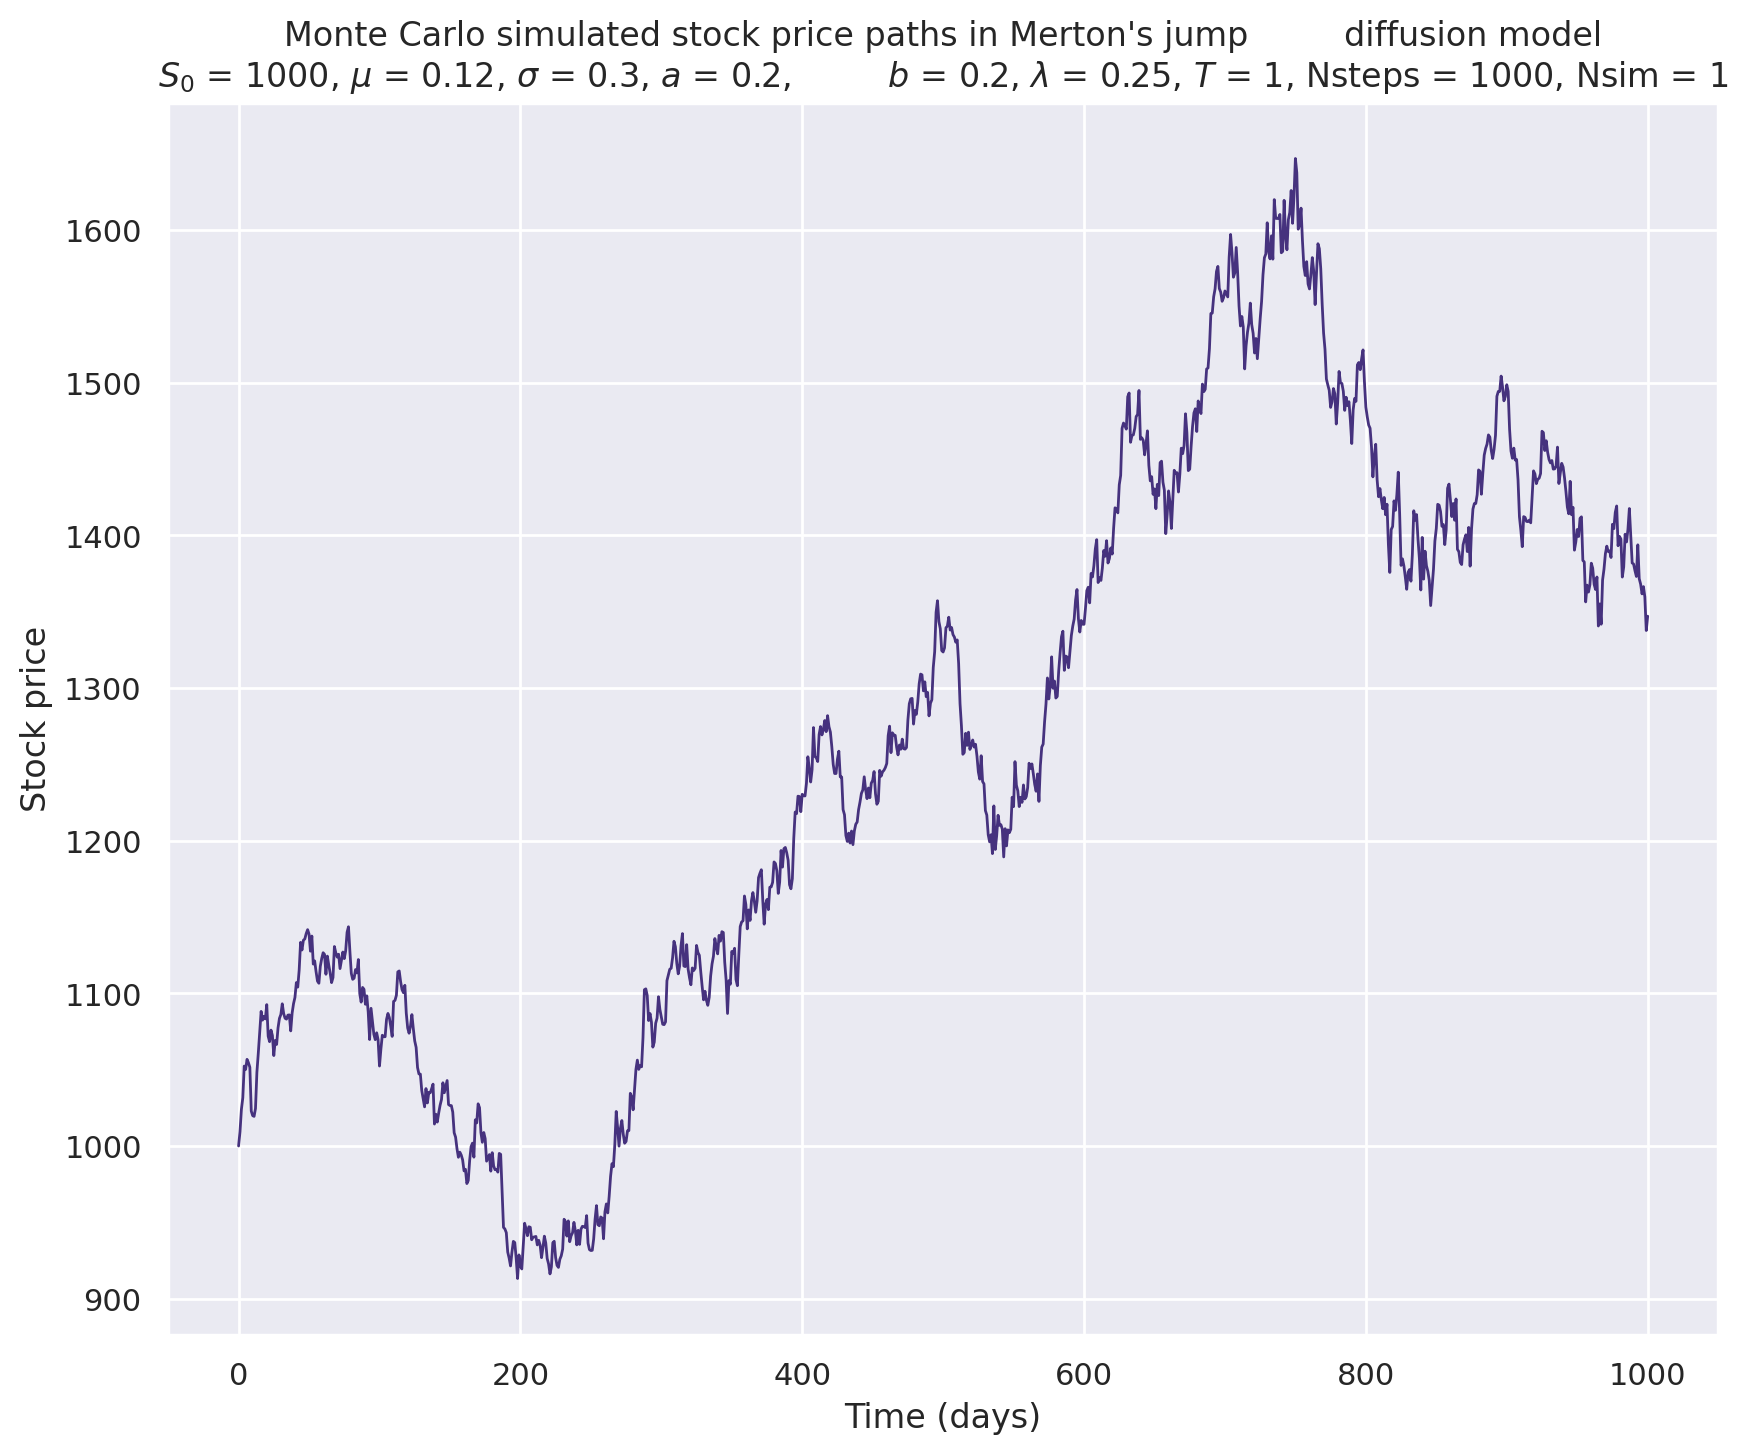

p value: 1.3333333333333333
Agent number is 1
Episode: 0
Total Reward: -197.56396962289168
Episode: 1
Total Reward: -273.6560148536012
Episode: 2
Total Reward: -41.363397827021394
Episode: 3
Total Reward: -219.78589064941082
Episode: 4
Total Reward: -27.941562795068265
Episode: 5
Total Reward: 8.26033219926541
Episode: 6
Total Reward: -10.897043528990029
Episode: 7
Total Reward: 11.496479969395645
Episode: 8
Total Reward: -12.702450315437547
Episode: 9
Total Reward: 65.33048216764354
Episode: 10
Total Reward: 101.77870308457994
Episode: 11
Total Reward: 90.91240522925663
Episode: 12
Total Reward: 128.62039035051436
Episode: 13
Total Reward: 83.0126041519687
Episode: 14
Total Reward: 66.90885438463307
Episode: 15
Total Reward: 120.38666327105969
Episode: 16
Total Reward: 87.39528916802296
Episode: 17
Total Reward: 53.77301885022413
Episode: 18
Total Reward: 135.01397835161464
Episode: 19
Total Reward: 115.21250861546768
Episode: 20
Total Reward: 31.6851144200248
Episode: 21
Total Reward

p_value parameters_returns[14.418069252907753]


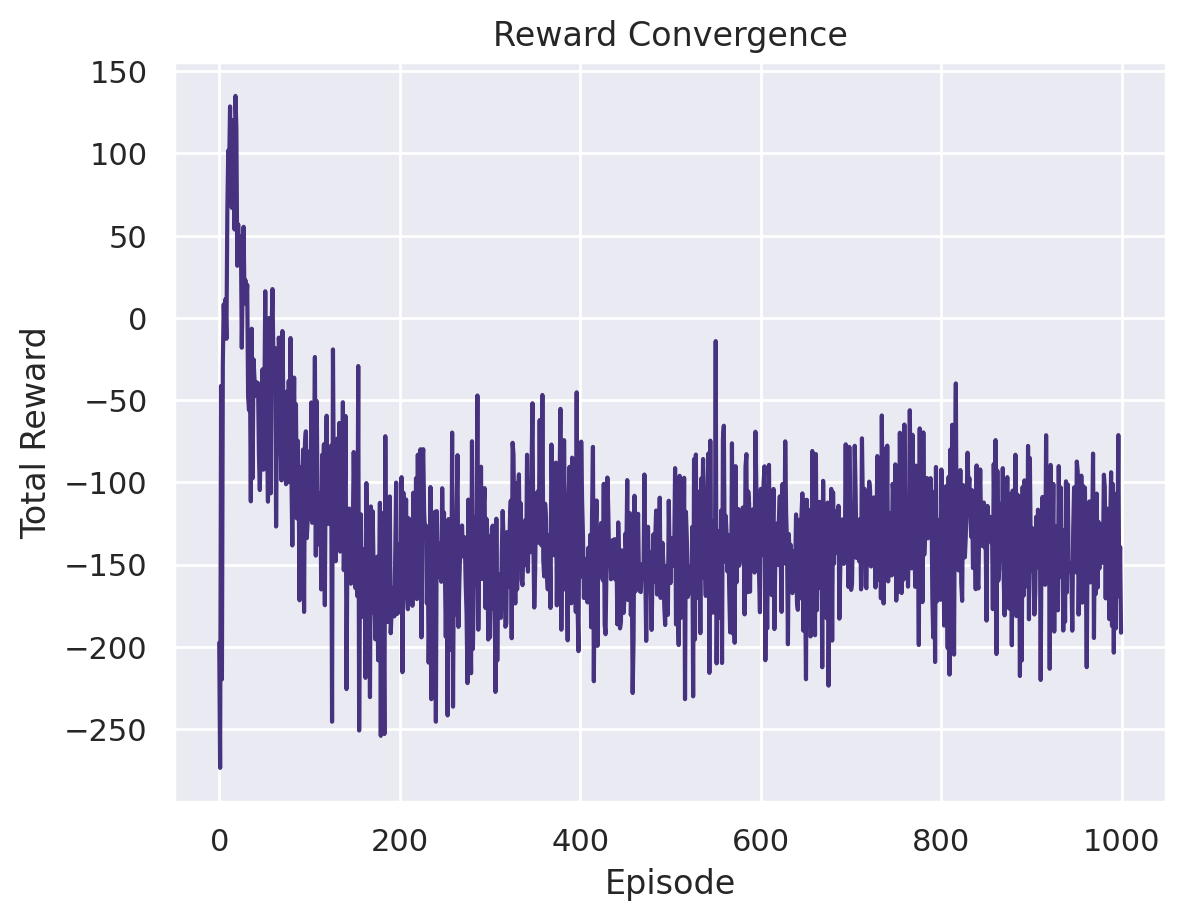

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict
from backtesting import Backtest, Strategy
import warnings, os, io, sys, json, math
from datetime import datetime
import IPython

warnings.filterwarnings("ignore")

class DistributionalQLearningAgent:
    ''' Please reach out for Distributional Q-learning agent'''


class ActionBasedStrategy(Strategy):
    agent=None
    test=False
    total_reward=0
    double=0
    learning= False
    state_store = []
    cumulative_sum = 0
    num_entries = 0
    candle_count = 0
    window_size = 25
    updating_traning=True

    def long_true(self, action):
        return action == 1

    def short_true(self, action):
        return action == -1

    def longClose(self, action):
        return action == -2

    def shortClose(self, action):
        return action == 2

    def takePosition(self,position):
        current_price = self.data.Close[-1]
        prev_price = self.data.Close[-2]
        self.entry_price = current_price
        self.entry_time = len(self.data)
        self.pos_state = self.state
        self.pos_action = self.action
        if position=="long":
            self.buy()
        elif position=="short":
            self.sell()

    def init(self):
        # super().init()
        self.actions = []
        self.action=None
        self.position_history = []
        self.current_state = None
        self.last_action = None
        self.entry_price = None
        self.entry_time = None
        self.non_log_price = True
        self.price_return = False
        self.state=None
        self.pos_state=None
        self.pos_action=None
        self.pos_close_factor = -1
        self.rew_move_factor = 0
        self.buyuk_sayi=1e8


    def next(self):
        self.candle_count += 1  # Increment the candle counter each time next() is called

        # Skip the trading logic until we have enough data for a full window of returns
        if self.candle_count <= self.window_size + 1:  # +1 because we need an extra point to compute returns
            return

        # Ensure there are enough candles to create a full window of returns
        if len(self.data.Close) < self.window_size + 1:  # +1 for the same reason as above
            return

        # Create a windowed distribution of logarithmic returns
        self.state = []

        ''' Please reach out for State description'''


        # Convert the list of log returns into a numpy array
        self.state = np.array(self.state[::-1])*self.buyuk_sayi  # Reverse to maintain chronological order
        # print(f'state:{self.state}')
        # Pass the state to the agent to get the best action,
        # self.state = self.data.Close[-1]
        self.action = self.agent.get_best_action(self.state)

        self.reward = 0

        # self.reward = self.reward_on_the_move(current_price,prev_price)*self.rew_move_factor
        # self.agent.update(prev_price, self.action, self.reward, current_price)
        # self.total_reward += self.reward
        if self.position.size == 0:
            if self.long_true(self.action):
                self.takePosition("long")
            elif self.short_true(self.action):
                self.takePosition("short")
        elif self.position.size != 0:
            self.check_reverse_correct(self.action)

    def check_reverse_correct(self, action):
        current_price = self.data.Close[-1]
        prev_price = self.data.Close[-2]
        if self.position.is_long and self.short_true(action):
            self.close_position(current_price)
            self.takePosition("short")
        elif self.position.is_short and self.long_true(action):
            self.close_position(current_price)
            self.takePosition("long")
        if self.position.is_long and self.longClose(action):
            self.close_position(current_price)
            self.position.close()
        elif self.position.is_short and self.shortClose(action):
            self.close_position(current_price)
            self.position.close()
        else: #hold
            self.reward += self.calculate_reward(current_price)*self.pos_close_factor
            if self.updating_traning==True:
                # self.agent.update(self.state, self.action, self.reward, self.pos_state)
                # print("hold")
                self.agent.update(self.pos_state, self.action, self.reward, self.state)
                self.total_reward += self.reward

    def close_position(self, current_price):
        self.reward += self.calculate_reward(current_price)*self.pos_close_factor
        self.position_history.append((self.entry_time, len(self.data), self.entry_price, current_price, self.reward))
        self.entry_price = None
        self.entry_time = None
        if self.updating_traning==True:
            # self.agent.update(self.state, self.action, self.reward, self.pos_state)
            # print("close")
            self.agent.update(self.pos_state, self.action, self.reward, self.state)
            self.total_reward += self.reward

    def calculate_reward(self, exit_price):
        ''' Please reach out for reward function '''
        

    def reward_on_the_move(self,current_price,prev_price):
        if prev_price is None:
            return 0
        if self.action == 1 or self.action == 2:
            return 1*(current_price - prev_price) / prev_price #*100
        elif self.action == -1 or self.action == -2:
            return -1*(current_price - prev_price) / prev_price #*100
        else:
            return 0

    def get_current_action(self):
        """
        Returns the current action chosen by the strategy.
        """
        return self.action


def plot_rewards(total_rewards):
    plt.plot(total_rewards)
    plt.title('Reward Convergence')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.show()


#training
saved_agents = []
num_of_episode=1000
pp=[4/3]#[32/31, 16/15, 8/7,4/3,2,4,10,100]

symbol = 'BTC-USDT'
df_30min = fetch_data(symbol=symbol)

df_30min_close = pd.DataFrame({
    'Open': df_30min['Close'],
    'High': df_30min['Close'],
    'Low': df_30min['Close'],
    'Close': df_30min['Close']
    # 'Volume': df_30min['Volume']
})

simulator = MonteCarloSimulator(Nsteps = 1000)
data1 = simulator.get_monte_carlo_data(Gaussian=False)

simulator = MonteCarloSimulator(Nsteps = 1000)
data2 = simulator.get_monte_carlo_data(Gaussian=False)

monte_carlo_data_close = preprocess_to_match(data1, df_30min_close[:3000], column='Close')
monte_carlo_data_close_vali = preprocess_to_match(data2, df_30min_close[:3000], column='Close')
simulator.plot_simulation()

saved_agents=[]
for p in pp:
    print(f"p value: {p}")
    bt = Backtest(data1, ActionBasedStrategy, cash=10000, commission=0.0)
    total_reward_of_strat = []
    stats = None
    states_p=[]
    my_agent = DistributionalQLearningAgent(alpha=0.001, epsilon=0.40, v_min=-1, v_max=1, n_atoms=25,p_value=p)
    for episode in range(num_of_episode):
        my_agent.epsilon =0.40
        # Run the backtest with updating training enabled
        ActionBasedStrategy.updating_training=True
        stats = bt.run(agent=my_agent)
        total_reward_of_strat.append(stats._strategy.total_reward)

        # Print episode information and total reward
        print(f"Episode: {episode}")
        print(f"Total Reward: {stats._strategy.total_reward}")

        # After the last episode, do a final check and potentially adjust agent settings
        if episode >= num_of_episode - 1:
            print(stats)
            bt.plot()

            # Run an additional test to check if adjustments are needed
            test_stats = bt.run(agent=my_agent, updating_training=False)
            if test_stats['Return [%]'] < 0:
                # If the return is negative, adjust epsilon to reduce exploration
                my_agent.epsilon *= 0.9
                print(f"Adjusted epsilon to {my_agent.epsilon}")

                # Optionally, you might want to retrain or do additional tests here
                print("Retraining with adjusted epsilon...")
                bt = Backtest(monte_carlo_data_close, ActionBasedStrategy, cash=10000, commission=0.0)
                stats = bt.run(agent=my_agent, updating_training=True)
                print(f"New training completed. Final Return: {stats['Return [%]']}")
        saved_agents.append(my_agent)

    states_p.append(stats['Return [%]'])
    print(f"p_value parameters_returns{states_p}")
    plt.plot(total_reward_of_strat)
    plt.title('Reward Convergence')
    plt.xlabel('Episode')
    plt.ylabel('Total Reward')
    plt.show()

#validation
# print("Starting Validation")
# results=[]
# num_of_tests=1
# for num in range(500):
#     total_reward_of_strat = []
#     stats = None
#     bt = Backtest(data2, ActionBasedStrategy, cash=10000, commission=0.0)
#     stats = bt.run(agent=my_agent, updating_traning=False)

#     if stats['Return [%]']<0:
#         # my_agent.epsilon*=0.9
#         bt = Backtest(data2, ActionBasedStrategy, cash=10000, commission=0.0)
#         stats = bt.run(agent=my_agent, updating_traning=False)
#     results.append(stats)
#     if (num + 1) % 100 == 0 or num == 0:
#         print(f"Episode {num + 1}: Return: {stats['Return [%]']}")
#     #bt.plot()
# # Prepare to store the mean values
# print("Validation Results")
# mean_results = {
#     "Exposure Time [%]": 0,
#     "Equity Final [$]": 0,
#     "Equity Peak [$]": 0,
#     "Return [%]": 0,
#     "Buy & Hold Return [%]": 0,
#     "Return (Ann.) [%]": 0,
#     "Volatility (Ann.) [%]": 0,
#     "Sharpe Ratio": 0,
#     "Sortino Ratio": 0,
#     "Calmar Ratio": 0,
#     "Max. Drawdown [%]": 0,
#     "Avg. Drawdown [%]": 0,
#     "Max. Drawdown Duration": pd.Timedelta(0),
#     "Avg. Drawdown Duration": pd.Timedelta(0),
#     "# Trades": 0,
#     "Win Rate [%]": 0,
#     "Best Trade [%]": 0,
#     "Worst Trade [%]": 0,
#     "Avg. Trade [%]": 0,
#     "Max. Trade Duration": pd.Timedelta(0),
#     "Avg. Trade Duration": pd.Timedelta(0),
#     "Profit Factor": 0,
#     "Expectancy [%]": 0,
#     "SQN": 0
# }

# # Accumulate values
# for res in results:
#     for key in mean_results:
#         if 'Duration' in key:  # Handle timedelta appropriately
#             mean_results[key] += pd.to_timedelta(res[key])
#         else:
#             mean_results[key] += res[key]

# # Calculate the mean of each metric
# num_results = len(results)
# for key in mean_results:
#     if 'Duration' in key:
#         mean_results[key] /= num_results
#     else:
#         mean_results[key] /= num_results

# # Print the mean results
# for key, value in mean_results.items():
#     print(f"{key}: {value}")


**Comment:** Luckily the rewards converged and the model end with profit. Therefore, we can say that the model learnt the stochastic behaviour. Now lets validate.

# Model Evaluation

## Validation

This section of the script is dedicated to validating the performance of the trading strategy developed using a Distributional Q-Learning agent. The validation process involves simulating multiple scenarios to test the strategy's robustness and consistency under varying market conditions.

**Starting Validation**
- The validation process kicks off by announcing its commencement via a print statement.

**Simulation and Backtesting Loop**
- The loop runs 500 simulations, each generating a new set of Monte Carlo simulated data representing market prices.
- For each simulation, a `Backtest` instance is created with an initial cash allocation of 10,000 and a small commission fee. The strategy is tested using the generated data without further training updates (`updating_traning=False`).

**Performance Assessment**
- After each backtest, the performance (`Return [%]`) is evaluated. If the return is negative, indicating a loss, the strategy undergoes another test round with no commission to assess if fee adjustments might improve performance.
- Performance metrics are recorded after each backtest. Every 100 simulations, the return from the latest simulation is printed to provide a progress update.

**Results Compilation**
- At the end of all simulations, the results are compiled into a dictionary holding initial values for various performance metrics, such as exposure time, final equity, peak equity, returns, volatility, Sharpe ratio, and many more.
  
**Aggregation of Results**
- The script accumulates results from each simulation to compute average values for all listed metrics. This aggregation accounts for variations in market conditions simulated across all tests.
- Special handling is included for timedelta objects, ensuring proper aggregation of duration-based metrics.

**Final Output**
- Average results for each performance metric are printed, providing a comprehensive overview of the strategy's effectiveness and reliability across simulated test cases. This output helps in determining the overall viability of the trading strategy.

By the end of this validation process, the strategy's performance is thoroughly assessed, offering valuable insights into its potential success in live trading scenarios.


In [ ]:
#validation
print("Starting Validation")
results=[]
num_of_tests=1
for num in range(500):
    total_reward_of_strat = []
    stats = None
    simulator = MonteCarloSimulator(Nsteps = 1000)
    data2 = simulator.get_monte_carlo_data(Gaussian=False)
    bt = Backtest(data2, ActionBasedStrategy, cash=10000, commission=0.0002)
    stats = bt.run(agent=my_agent, updating_traning=False)

    if stats['Return [%]']<0:
        # my_agent.epsilon*=0.9
        bt = Backtest(data2, ActionBasedStrategy, cash=10000, commission=0.0)
        stats = bt.run(agent=my_agent, updating_traning=False)
    results.append(stats)
    if (num + 1) % 100 == 0 or num == 0:
        print(f"Episode {num + 1}: Return: {stats['Return [%]']}")
    #bt.plot()
# Prepare to store the mean values
print("Validation Results")
mean_results = {
    "Exposure Time [%]": 0,
    "Equity Final [$]": 0,
    "Equity Peak [$]": 0,
    "Return [%]": 0,
    "Buy & Hold Return [%]": 0,
    "Return (Ann.) [%]": 0,
    "Volatility (Ann.) [%]": 0,
    "Sharpe Ratio": 0,
    "Sortino Ratio": 0,
    "Calmar Ratio": 0,
    "Max. Drawdown [%]": 0,
    "Avg. Drawdown [%]": 0,
    "Max. Drawdown Duration": pd.Timedelta(0),
    "Avg. Drawdown Duration": pd.Timedelta(0),
    "# Trades": 0,
    "Win Rate [%]": 0,
    "Best Trade [%]": 0,
    "Worst Trade [%]": 0,
    "Avg. Trade [%]": 0,
    "Max. Trade Duration": pd.Timedelta(0),
    "Avg. Trade Duration": pd.Timedelta(0),
    "Profit Factor": 0,
    "Expectancy [%]": 0,
    "SQN": 0
}

# Accumulate values
for res in results:
    for key in mean_results:
        if 'Duration' in key:  # Handle timedelta appropriately
            mean_results[key] += pd.to_timedelta(res[key])
        else:
            mean_results[key] += res[key]

# Calculate the mean of each metric
num_results = len(results)
for key in mean_results:
    if 'Duration' in key:
        mean_results[key] /= num_results
    else:
        mean_results[key] /= num_results

# Print the mean results
for key, value in mean_results.items():
    print(f"{key}: {value}")


Starting Validation
Episode 1: Return: -8.762461393386202
Episode 100: Return: -22.509360644851277
Episode 200: Return: 101.36316947105361
Episode 300: Return: 3.353678288940609
Episode 400: Return: -12.207450441350884
Episode 500: Return: 10.215183637174487
Validation Results
Exposure Time [%]: 95.01718281718244
Equity Final [$]: 11573.65155969258
Equity Peak [$]: 13383.686824979084
Return [%]: 15.736515596925932
Buy & Hold Return [%]: 18.17162380526264
Return (Ann.) [%]: 1417699.0114608307
Volatility (Ann.) [%]: 659434550.299935
Sharpe Ratio: 0.35860586599215843
Sortino Ratio: 54459.2478737568
Calmar Ratio: 116520.25306026875
Max. Drawdown [%]: -24.509707199524232
Avg. Drawdown [%]: -5.5798019171758915
Max. Drawdown Duration: 11 days 10:35:27.600000
Avg. Drawdown Duration: 2 days 04:28:54.240000
# Trades: 100.064
Win Rate [%]: 53.85008070766199
Best Trade [%]: 13.399636601769423
Worst Trade [%]: -8.977988157867005
Avg. Trade [%]: 0.24549173908151484
Max. Trade Duration: 0 days 23:28:

**Comment:** Here we see that on average our model profits over 500 tests. Now it is time to take the real data and test on it.

## Real test

The `results_analyzer` function is designed to process and summarize the performance metrics of a trading strategy after backtesting. This function is a critical component of the strategy evaluation process, providing a quantitative basis for assessing the effectiveness and robustness of the strategy.

**Function: `results_analyzer`**
- **Purpose**: To aggregate and compute the average of various trading performance metrics from multiple backtesting results.
- **Parameters**: `results` - a list of dictionaries, each containing performance metrics from an individual backtest.
- **Process**:
  - Initializes a dictionary, `mean_results`, with all metrics set to zero.
  - Iteratively accumulates results from each test into `mean_results`.
  - Handles specific data types appropriately, particularly `pd.Timedelta` for duration metrics.
  - Computes the average for each metric across all results.
  - Prints the averaged results, providing a comprehensive view of strategy performance.

**Backtesting Loop and Function Invocation**:
- The script sets up a backtest using the `ActionBasedStrategy` with a significant cash reserve and a specified commission rate.
- Conducts 100 backtest runs to gather a substantial dataset on strategy performance under consistent conditions.
- Each backtest's statistics are collected into the `results` list.
- After collecting data from all runs, `results_analyzer` is called to process and display the summarized results.
- The performance of the strategy is plotted using `bt.plot()` for visual assessment alongside the numerical analysis.

**Key Metrics Analyzed**:
- **Exposure Time, Equity Final, Equity Peak**: Measures the time exposed to the market, final and peak equity levels, providing insights into the capital growth and risk exposure.
- **Returns Metrics**: Including raw, annualized, and buy & hold returns.
- **Risk Metrics**: Volatility, Sharpe Ratio, Sortino Ratio, and Calmar Ratio, offering a detailed view of the risk-adjusted performance.
- **Drawdown Metrics**: Maximum and average drawdowns and their durations, crucial for understanding the potential losses.
- **Trade Metrics**: Number of trades, win rate, best and worst trades, average trade performance, trade durations, and expectancy, which detail the strategy's operational effectiveness.

This function and the backtesting loop are vital for rigorously evaluating the trading strategy, ensuring it is tested across a range of scenarios to validate its potential for real-world application.


In [ ]:
def results_analyzer(results):
    print("Results")
    mean_results = {
        "Exposure Time [%]": 0,
        "Equity Final [$]": 0,
        "Equity Peak [$]": 0,
        "Return [%]": 0,
        "Buy & Hold Return [%]": 0,
        "Return (Ann.) [%]": 0,
        "Volatility (Ann.) [%]": 0,
        "Sharpe Ratio": 0,
        "Sortino Ratio": 0,
        "Calmar Ratio": 0,
        "Max. Drawdown [%]": 0,
        "Avg. Drawdown [%]": 0,
        "Max. Drawdown Duration": pd.Timedelta(0),
        "Avg. Drawdown Duration": pd.Timedelta(0),
        "# Trades": 0,
        "Win Rate [%]": 0,
        "Best Trade [%]": 0,
        "Worst Trade [%]": 0,
        "Avg. Trade [%]": 0,
        "Max. Trade Duration": pd.Timedelta(0),
        "Avg. Trade Duration": pd.Timedelta(0),
        "Profit Factor": 0,
        "Expectancy [%]": 0,
        "SQN": 0
    }

    # Accumulate values
    for res in results:
        for key in mean_results:
            if 'Duration' in key:  # Handle timedelta appropriately
                mean_results[key] += pd.to_timedelta(res[key])
            else:
                mean_results[key] += res[key]

    # Calculate the mean of each metric
    num_results = len(results)
    for key in mean_results:
        if 'Duration' in key:
            mean_results[key] /= num_results
        else:
            mean_results[key] /= num_results

    # Print the mean results
    for key, value in mean_results.items():
        print(f"{key}: {value}")
    results=[]

bt = Backtest(df_30min_close, ActionBasedStrategy, cash=10000000, commission=0.0002)
results=[]
for i in range(100):
    stats = bt.run(agent=my_agent, updating_training=False)
    # print("REAL DATA")
    # print(stats)
    if i % 10 == 0:
        print(f"{i}th test is done")
    results.append(stats)
bt.plot()
results_analyzer(results)

0th test is done
10th test is done
20th test is done
30th test is done
40th test is done
50th test is done
60th test is done
70th test is done
80th test is done
90th test is done


Validation Results
Exposure Time [%]: 62.350364583333366
Equity Final [$]: 12455207.80768053
Equity Peak [$]: 17854089.02770348
Return [%]: 24.552078076805287
Buy & Hold Return [%]: 34.3658906292511
Return (Ann.) [%]: 0.0
Volatility (Ann.) [%]: nan
Sharpe Ratio: nan
Sortino Ratio: nan
Calmar Ratio: 0.0
Max. Drawdown [%]: -48.36681373075306
Avg. Drawdown [%]: -1.8728099395819973
Max. Drawdown Duration: 0 days 00:00:00.000013437
Avg. Drawdown Duration: 0 days 00:00:00.000000241
# Trades: 3107.66
Win Rate [%]: 52.544541104612534
Best Trade [%]: 7.7218400664232965
Worst Trade [%]: -16.0908355179839
Avg. Trade [%]: 0.038669013981907474
Max. Trade Duration: 0 days 00:00:00.000000024
Avg. Trade Duration: 0 days 00:00:00.000000003
Profit Factor: 1.1556199254922963
Expectancy [%]: 0.043742436707306084
SQN: 0.2978099902574191


**Comment:** Here is the most important part of the project. As I mentioned previously, I did not fix the seed for randomness. Thus, in each 100 iterations on average we need to get the profit.

For robustness, we did not fix the seed for randomness so that we will not fine tune for random noise. Hence in each running of the file, we will end up with similar results. That's why I am coarse graining by the for loops.

The aim is not to get the highest profit in one go, but rather get a good result on average. Therefore Robostness is built into itself thanks to stochastic behaviour of the Finance.

# End

**Concluding Remarks:** The financial predictions is really hard. However we can create an ML model that will run through the data and gather profit if the underlying stocks (here cryptocurrencies) obey Merton model.

Of course, we cannot know how market behaves, however models can picture out what they might obey. Moreover, it is hard to train a classical Q-learning agent for the trades as the underlying data is stochastic. This is the reason why I employed Distributional RL model given in paper https://arxiv.org/pdf/1707.06887 .

In data analysis, We can see that the near-normality is reached in log-log scale of the returns, as raw data of Close values is not helpful. Then by using Distributional Bellman equation, we can grasp distributional update inside the agent's code.

After building the model, we observed that rewards are converged with profit. Then, we can validate the results by creating more monte carlos to test on them and get an average positive profit.

The most important part however is to earn profit in the real world data. We can see that on average we would have a positive return. Therefore we can say that our model worked.

However, this does not prove that our model will work as we need to check other metrics for further analysis given that finance is an evolving region.